In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os

In [2]:
#To get current working directory path.
os.getcwd()

'C:\\Users\\admin\\Data Science lab'

In [3]:
#Change the corrent working directory
os.chdir("F:\\Job\\Internship\\Data_Science_Lab")
df=pd.read_excel("Orders.xlsx",sheet_name=1)
df.head()

,CustomerID,OrderID,OrderDate,OrderDeliveryDate,CategoryCode,ProductCode,ProductQuantity,PriceTotal,Number_of_Delivery_days
0,1387,ONO113523062,2019-05-17 18:08:07,2019-05-21,S3-1640353,PID845403,2,1032.0,4
1,1522,ONO113679282,2019-06-03 17:51:37,2019-06-11,S3-4540834,PID1284421,1,366.9,8
2,1557,ONO113680182,2019-06-04 08:24:35,2019-06-05,S3-1640353,PID845403,1,516.0,1
3,1581,ONO113680482,2019-06-04 10:16:29,2019-06-07,S3-7341339,PID316370,1,92.9,3
4,202595,ONO112735832,2019-01-30 11:42:31,2019-01-31,S3-9021560,PID2846148,4,459.6,1


Creating copy of original data

In [4]:
data=df.copy()

**Exploratory data analysis**

1.Getting to know the data

2.Data preprocessing(Missing values)

3.Cross table and data visualization

In [5]:
data.shape

(66, 9)

* There are total 66 rows and 8 columns in the "Order" data set.

**Check Missing values**

In [6]:
print("Data columns with null values:\n",data.isnull().sum())

Data columns with null values:
 CustomerID                 0
OrderID                    0
OrderDate                  0
OrderDeliveryDate          0
CategoryCode               0
ProductCode                0
ProductQuantity            0
PriceTotal                 0
Number_of_Delivery_days    0
dtype: int64


* There are no missing values.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CustomerID               66 non-null     int64         
 1   OrderID                  66 non-null     object        
 2   OrderDate                66 non-null     datetime64[ns]
 3   OrderDeliveryDate        66 non-null     datetime64[ns]
 4   CategoryCode             66 non-null     object        
 5   ProductCode              66 non-null     object        
 6   ProductQuantity          66 non-null     int64         
 7   PriceTotal               66 non-null     float64       
 8   Number_of_Delivery_days  66 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 4.8+ KB


In [19]:
# Descriptive statistics for numberical columns
data[["ProductQuantity","Number_of_Delivery_days","PriceTotal"]].describe()

,ProductQuantity,Number_of_Delivery_days,PriceTotal
count,66.000000,66.000000,66.000000
mean,1.454545,2.651515,141.593939
std,0.897549,2.222213,172.606655
min,1.000000,1.000000,21.800000
25%,1.000000,1.250000,47.825000
50%,1.000000,2.000000,94.850000
75%,2.000000,2.000000,146.825000
max,6.000000,8.000000,1032.000000


In [9]:
# Descriptive statistics for non-numberical columns
data.describe(include=[object])

,OrderID,CategoryCode,ProductCode
count,66,66,66
unique,19,38,44
top,ONO114287752,S3-7421350,PID1531682
freq,24,5,4


**1. How many customers have placed an order?**

In [10]:
data.columns

Index(['CustomerID', 'OrderID', 'OrderDate', 'OrderDeliveryDate',
       'CategoryCode', 'ProductCode', 'ProductQuantity', 'PriceTotal',
       'Number_of_Delivery_days'],
      dtype='object')

In [11]:
data["CustomerID"].unique()

array([  1387,   1522,   1557,   1581, 202595, 264868, 264922, 264930,
       264981, 265011], dtype=int64)

In [12]:
len(data["CustomerID"].unique())

10

**2. What are the different categorical_order products that customers have ordered?**

In [13]:
data["CategoryCode"].unique()

array(['S3-1640353', 'S3-4540834', 'S3-7341339', 'S3-9021560',
       'S3-8981557', 'S3-9261616', 'S3-9261613', 'S3-9261618',
       'S3-9061571', 'S3-1600338', 'S3-1760373', 'S3-7261313',
       'S3-7261314', 'S3-7421350', 'S3-7901428', 'W3-104519007710',
       'W3-104519007730', 'S3-7501359', 'S3-7861408', 'S3-7861415',
       'S3-1600340', 'S3-1600341', 'S3-1720367', 'S3-2460497',
       'S3-6381219', 'S3-6381221', 'S3-7261316', 'S3-7341336',
       'S3-7381341', 'S3-7381342', 'S3-7381343', 'S3-7381345',
       'S3-7381347', 'S3-7701376', 'S3-7701380', 'W3-104919007730',
       'S3-7861412', 'W3-104919009910'], dtype=object)

In [14]:
len(data["CategoryCode"].unique())

38

**3. What are the different products that customers have ordered?**

In [15]:
data["ProductCode"].unique()

array(['PID845403', 'PID1284421', 'PID316370', 'PID2846148', 'PID2018601',
       'PID978217', 'PID1255545', 'PID1255553', 'PID2657744',
       'PID2652785', 'PID1338645', 'PID2017540', 'PID2177564',
       'PID924400', 'PID1006561', 'PID297023', 'PID294784', 'PID3007859',
       'PID254707', 'PID537008', 'PID3134281', 'PID3134230', 'PID1170602',
       'PID1390122', 'PID818597', 'PID1149605', 'PID1323168', 'PID641794',
       'PID453807', 'PID197940', 'PID313541', 'PID1785498', 'PID3110771',
       'PID3110836', 'PID1852721', 'PID298992', 'PID1531682', 'PID509950',
       'PID1124319', 'PID2953017', 'PID3110798', 'PID537024', 'PID536958',
       'PID3134303'], dtype=object)

In [16]:
len(data["ProductCode"].unique())

44

(array([47.,  0., 12.,  0.,  5.,  0.,  1.,  0.,  0.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

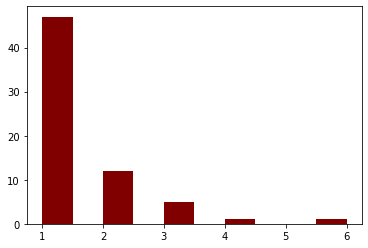

In [17]:
plt.hist(data["ProductQuantity"], color ='maroon')

In [18]:
ct=pd.crosstab(data.ProductQuantity,data.ProductQuantity)
ct

ProductQuantity,1,2,3,4,6
ProductQuantity,,,,,
1,47,0,0,0,0
2,0,12,0,0,0
3,0,0,5,0,0
4,0,0,0,1,0
6,0,0,0,0,1


In [19]:
data["ProductQuantity"].value_counts()

1    47
2    12
3     5
6     1
4     1
Name: ProductQuantity, dtype: int64

**Distribution of days taken to deliver product**

In [20]:
data["Number_of_Delivery_days"].unique()

array([4, 8, 1, 3, 2, 7], dtype=int64)

In [21]:
data["Number_of_Delivery_days"].value_counts()

2    37
1    17
8     7
7     3
4     1
3     1
Name: Number_of_Delivery_days, dtype: int64

In [22]:
(17+37)*100/66

81.81818181818181

Text(0, 0.5, 'Number of orders(Frequency)')

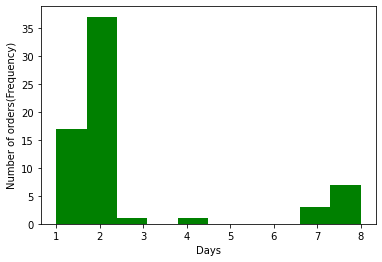

In [18]:
plt.hist(data["Number_of_Delivery_days"],cumulative=False, color ='green')
#plt.title('')
plt.xlabel('Days')
plt.ylabel('Number of orders(Frequency)')

In [16]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `

In [24]:
data["Number_of_Delivery_days"].describe()

count    66.000000
mean      2.651515
std       2.222213
min       1.000000
25%       1.250000
50%       2.000000
75%       2.000000
max       8.000000
Name: Number_of_Delivery_days, dtype: float64

In [25]:
uni_customer=data["CustomerID"].unique()
uni_customer
len(uni_customer)

10

**Date Time Calculations**

In [26]:
data.columns

Index(['CustomerID', 'OrderID', 'OrderDate', 'OrderDeliveryDate',
       'CategoryCode', 'ProductCode', 'ProductQuantity', 'PriceTotal',
       'Number_of_Delivery_days'],
      dtype='object')

In [27]:
t1=data["OrderDate"]
t2=data["OrderDeliveryDate"]
t3=t2-t1
type(t1)
type(t2)

pandas.core.series.Series

In [28]:
d=pd.DataFrame({"t1":t1,"t2":t2,"t2-t1":t2-t1}).head()
d

,t1,t2,t2-t1
0,2019-05-17 18:08:07,2019-05-21,3 days 05:51:53
1,2019-06-03 17:51:37,2019-06-11,7 days 06:08:23
2,2019-06-04 08:24:35,2019-06-05,0 days 15:35:25
3,2019-06-04 10:16:29,2019-06-07,2 days 13:43:31
4,2019-01-30 11:42:31,2019-01-31,0 days 12:17:29


In [29]:
for i in d["t2-t1"]:
    print(i)

3 days 05:51:53
7 days 06:08:23
0 days 15:35:25
2 days 13:43:31
0 days 12:17:29


In [51]:
t3.head()

0   3 days 05:51:53
1   7 days 06:08:23
2   0 days 15:35:25
3   2 days 13:43:31
4   0 days 12:17:29
dtype: timedelta64[ns]